In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

Prepare the Data

In [2]:
#prep data
#load data
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
#pre-process-->need all data to be numeric
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [8]:
# remove "MYOPIC" col.
new_df = df.drop("MYOPIC", axis=1)

#review data types
new_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [10]:
#remove na rows
new_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [11]:
#remove duplicates
new_df.duplicated().sum()

0

In [13]:
#standardize data w scaler --> create scaler, fit data, new df w transformed data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

data = pd.DataFrame(scaled_data, columns=new_df.columns[0:])
data['MYOPIC'] = df['MYOPIC']
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,1
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,0
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,0
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,1
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,0


In [14]:
#save clean data
file_path = Path("myopia_transformed.csv")
data.to_csv(file_path, index=False)

Apply Dimensionality Reduction

In [17]:
#perform pca
from sklearn.decomposition import PCA
pca = PCA(n_components= .9) 
myopia_pca = pca.fit_transform(scaled_data)

In [18]:
#variance 
sum(pca.explained_variance_ratio_)

0.9187361702915188

In [34]:
#reduce data set with tsne
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100) 
myopia_tsne = tsne.fit_transform(myopia_pca)

C:\Users\COOPERKK\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


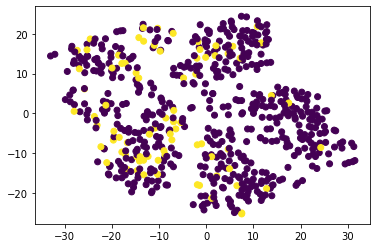

In [35]:
#scatter plot
#df
tsne_data = pd.DataFrame()
tsne_data['x'] = myopia_tsne[:,0]
tsne_data['y'] = myopia_tsne[:,1]

#labels
labels = X['MYOPIC']

plt.scatter(tsne_data['x'], tsne_data['y'],c=labels)
plt.show()

Cluster Analysis with  K-means

In [36]:
#elbow curve to determine cluster number
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)  
    inertia.append(km.inertia_)

elbow_curve= {"k": k, "inertia": inertia}
elbow_data = pd.DataFrame(elbow_curve)
elbow_data.head()

C:\Users\COOPERKK\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


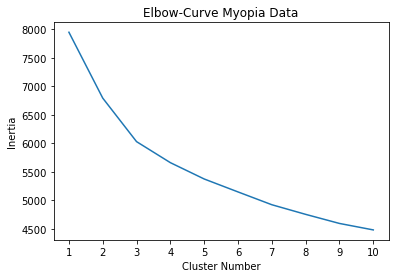

In [39]:
#plot elbow curve
plt.plot(elbow_data['k'], elbow_data['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.title('Elbow-Curve Myopia Data')
plt.show()

Make a Recommendation

PCA dimensionality reduction reduced the data to 10 columns
The variance captured 91.8% for 90% of components (n_components = .9).

T-SNE model reducted data to 2 columns when the learning rate was set to 100.  
The scatter plot shows no distinct clusters with fewer patients with myopia.

The elbow-curve plot shows inertia between 6500 and 7000 for 2 clusters, and inertia around 6000 for 3 clusters.

For this myopia data set, the algorithm shows that patients can't be clustered together due to the small/ limited data set.
The recommendation is to use a larger data set and test it with the same algorithm. This will allow a more accurate prediction. 